In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

In [208]:
uptimes = pd.read_csv("Uptimes - posts.csv")
# uptimes = uptimes.loc[:, ['Post number', 'Title', 'Img OCR Text', 'Img Real Text', 'Uptimes', 'SO']]
uptimes['Uptimes'].mean()
dataframe = uptimes

In [4]:
ups = uptimes.loc[pd.notna(uptimes['Uptimes'])]['Uptimes']
np.mean(ups)


1127.9644812680115

In [80]:
dataframe.describe(include='all')

,Post number,Title,Img OCR Text,Img Real Text,Uptimes,SO
count,358.000000,357,345,0.0,347.000000,279
unique,NaN,356,343,NaN,NaN,23
top,NaN,Found in the wild\n,ea a See See en\nSTERN ra ae He a Te ee\ncera ...,NaN,NaN,linux
freq,NaN,2,2,NaN,NaN,96
mean,204.801676,NaN,NaN,NaN,1127.964481,NaN
std,130.415571,NaN,NaN,NaN,1274.731427,NaN
min,-1.000000,NaN,NaN,NaN,7.000000,NaN
25%,92.250000,NaN,NaN,NaN,214.500000,NaN
50%,195.500000,NaN,NaN,NaN,666.000000,NaN
75%,307.500000,NaN,NaN,NaN,1673.000000,NaN


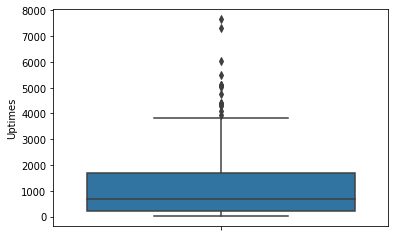

In [6]:
dataframe

,Post number,Title,Img OCR Text,Unnamed: 3,Unnamed: 4,Unnamed: 5,Img Real Text,Uptimes,SO,Post number aux
0,1,My IP phone\n,osc Teese\nPaprcrevrrner etree. 0\nru mera\n\n...,NaN,NaN,NaN,NaN,327.0,android,2.0
1,2,1897 days & counting\n,"[root@ EO Eee bata\n@9:03:23 up 1897 days, 6:4...",NaN,NaN,NaN,NaN,1897.0,linux,3.0
2,3,Moving this baby soon :( VPS running remote su...,fi javier — bbrother@remote: ~ — ssh bbrother@...,NaN,NaN,NaN,NaN,923.0,linux,4.0
3,4,Goodbye old friend\n,"[root@dev ~]# uptime\n\n16:10:56 up 1598 days,...",NaN,NaN,NaN,NaN,1598.0,linux,5.0
4,5,About to shut down my little free-trial GCP VM...,ena\n\n[root@slowpoke ~]# uptime\n15:26:37 up ...,NaN,NaN,NaN,NaN,265.0,linux,6.0
5,6,Huawei modem\n,Downlink rate keive\n\nOnline time 7eatahi mine,NaN,NaN,NaN,NaN,754.0,NaN,7.0
6,7,This server must've never been rebooted... cos...,"eee cn :~ (ssh)\n\n9%) Tasks: 884 total, 2 run...",NaN,NaN,NaN,NaN,1483.0,NaN,8.0
7,8,I'm embarrassed to post this...\n,"root@proxmox:~# uptime\n12:50:14 up 1140 days,...",NaN,NaN,NaN,NaN,1140.0,linux,9.0
8,9,"Shutting it down tomorrow, so close to 4 digit...",EC)\nease\nDOOR RCC PC PREC oe Me el oe\n\nVMw...,NaN,NaN,NaN,NaN,990.0,NaN,10.0
9,10,Not bad for daily driven gaming/web browsing p...,Rea\n\n \n\n \n\n \n\n \n\nFile Options View\n...,NaN,NaN,NaN,NaN,20.0,windows,11.0


Text(0.5,1,'Uptimes(Days)')

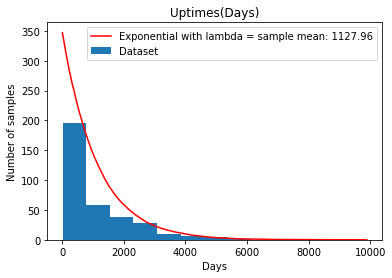

In [4]:

plt.hist(ups)
taxa = np.mean(ups)
# amostras = np.random.exponential(taxa, len(ups))
amostras = np.random.exponential(taxa, 10000)
plt.plot(sorted(amostras, reverse=True), np.linspace(0, len(ups), len(amostras)), 'r')
plt.xlabel("Days")
plt.ylabel("Number of samples")
plt.legend(["Exponential with lambda = sample mean: " + str(round(np.mean(ups), 2)), "Dataset"])
plt.title("Uptimes(Days)")
# plt.grid(True)
# plt.savefig("uptimes.png", format="png")

In [5]:
len(uptimes)

358

In [188]:
float('nan')

nan

In [211]:
dataframe.replace(['cisco', 'iphone'], 'router', inplace=True)
dataframe.replace(['ios', 'iphone'], 'mac', inplace=True)
dataframe['SO'].replace(['', 'hd', 'esxi', 'drive', 'vcenter',  'HP-UX', 'redhat', float('nan')], 'others', inplace=True)
dataframe.rename(columns={'Uptimes': 'Uptime (days)'}, inplace=True)

In [184]:
SO_list = ['linux', 'windows', 'router', 'android', 'mac', 'freebsd', 'solaris', 'junos', 'others']

In [212]:
dataframe3 = dataframe[dataframe['SO'].isin(SO_list)]
print(dataframe3.shape)
dataframe3

(350, 10)


,Post number,Title,Img OCR Text,Unnamed: 3,Unnamed: 4,Unnamed: 5,Img Real Text,Uptime (days),SO,Post number aux
0,1,My IP phone\n,osc Teese\nPaprcrevrrner etree. 0\nru mera\n\n...,NaN,NaN,NaN,NaN,327.0,android,2.0
1,2,1897 days & counting\n,"[root@ EO Eee bata\n@9:03:23 up 1897 days, 6:4...",NaN,NaN,NaN,NaN,1897.0,linux,3.0
2,3,Moving this baby soon :( VPS running remote su...,fi javier — bbrother@remote: ~ — ssh bbrother@...,NaN,NaN,NaN,NaN,923.0,linux,4.0
3,4,Goodbye old friend\n,"[root@dev ~]# uptime\n\n16:10:56 up 1598 days,...",NaN,NaN,NaN,NaN,1598.0,linux,5.0
4,5,About to shut down my little free-trial GCP VM...,ena\n\n[root@slowpoke ~]# uptime\n15:26:37 up ...,NaN,NaN,NaN,NaN,265.0,linux,6.0
5,6,Huawei modem\n,Downlink rate keive\n\nOnline time 7eatahi mine,NaN,NaN,NaN,NaN,754.0,others,7.0
6,7,This server must've never been rebooted... cos...,"eee cn :~ (ssh)\n\n9%) Tasks: 884 total, 2 run...",NaN,NaN,NaN,NaN,1483.0,others,8.0
7,8,I'm embarrassed to post this...\n,"root@proxmox:~# uptime\n12:50:14 up 1140 days,...",NaN,NaN,NaN,NaN,1140.0,linux,9.0
8,9,"Shutting it down tomorrow, so close to 4 digit...",EC)\nease\nDOOR RCC PC PREC oe Me el oe\n\nVMw...,NaN,NaN,NaN,NaN,990.0,others,10.0
9,10,Not bad for daily driven gaming/web browsing p...,Rea\n\n \n\n \n\n \n\n \n\nFile Options View\n...,NaN,NaN,NaN,NaN,20.0,windows,11.0


In [96]:
dataframe.dropna(inplace=True, subset=['Uptime (days)'])

In [128]:
dataframe2 = dataframe.drop(dataframe.nlargest(n=10, columns=['Uptime (days)']).index)
dataframe.shape

(347, 6)

In [116]:
dataframe.shape

(347, 6)

In [117]:
dataframe2.shape

(342, 6)

In [123]:
dataframe['Uptime (days)'].std()

1274.7314273043512

In [130]:
dataframe2['Uptime (days)'].std()

1014.0269605595422

In [131]:
dataframe2['Uptime (days)'].mean()

995.1711424332345

In [202]:
dataframe.rename(columns={'Uptimes': 'Uptime (days)'}, inplace=True)

In [192]:
dataframe3.rename(columns={'Uptimes': 'Uptime (days)'}, inplace=True)

C:\Users\Felipe\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [195]:
dataframe3

,Post number,Title,Img OCR Text,Unnamed: 3,Unnamed: 4,Unnamed: 5,Img Real Text,Uptime (days),SO,Post number aux
0,1,My IP phone\n,osc Teese\nPaprcrevrrner etree. 0\nru mera\n\n...,others,others,others,others,327,android,2
1,2,1897 days & counting\n,"[root@ EO Eee bata\n@9:03:23 up 1897 days, 6:4...",others,others,others,others,1897,linux,3
2,3,Moving this baby soon :( VPS running remote su...,fi javier — bbrother@remote: ~ — ssh bbrother@...,others,others,others,others,923,linux,4
3,4,Goodbye old friend\n,"[root@dev ~]# uptime\n\n16:10:56 up 1598 days,...",others,others,others,others,1598,linux,5
4,5,About to shut down my little free-trial GCP VM...,ena\n\n[root@slowpoke ~]# uptime\n15:26:37 up ...,others,others,others,others,265,linux,6
5,6,Huawei modem\n,Downlink rate keive\n\nOnline time 7eatahi mine,others,others,others,others,754,others,7
6,7,This server must've never been rebooted... cos...,"eee cn :~ (ssh)\n\n9%) Tasks: 884 total, 2 run...",others,others,others,others,1483,others,8
7,8,I'm embarrassed to post this...\n,"root@proxmox:~# uptime\n12:50:14 up 1140 days,...",others,others,others,others,1140,linux,9
8,9,"Shutting it down tomorrow, so close to 4 digit...",EC)\nease\nDOOR RCC PC PREC oe Me el oe\n\nVMw...,others,others,others,others,990,others,10
9,10,Not bad for daily driven gaming/web browsing p...,Rea\n\n \n\n \n\n \n\n \n\nFile Options View\n...,others,others,others,others,20,windows,11


In [228]:
dataframe3[dataframe3['SO']=='freebsd'].std()

Post number         154.991244
Unnamed: 3                 NaN
Unnamed: 4                 NaN
Unnamed: 5                 NaN
Img Real Text              NaN
Uptime (days)      1720.565785
Post number aux     154.991244
dtype: float64

In [229]:
dataframe3[dataframe3['SO']=='router'].std()

Post number         118.353319
Unnamed: 3                 NaN
Unnamed: 4                 NaN
Unnamed: 5                 NaN
Img Real Text              NaN
Uptime (days)      1905.908378
Post number aux     118.353319
dtype: float64

In [226]:
dataframe3[dataframe3['SO']=='mac'].mean()

Post number        207.285714
Unnamed: 3                NaN
Unnamed: 4                NaN
Unnamed: 5                NaN
Img Real Text             NaN
Uptime (days)      649.571429
Post number aux    208.285714
dtype: float64

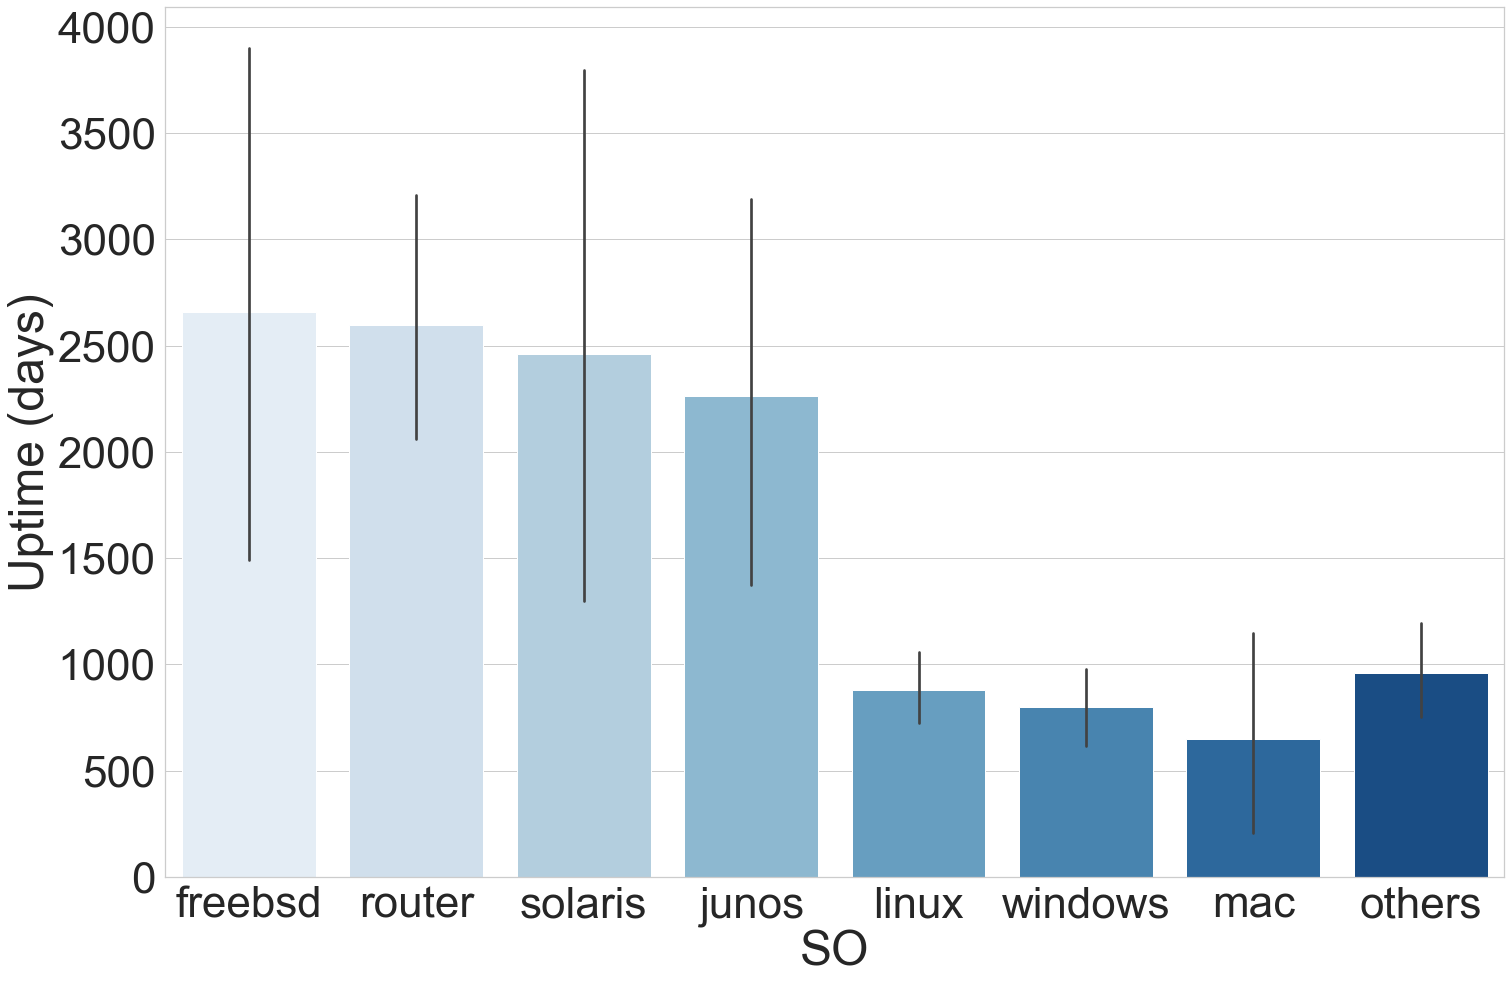

In [231]:
plt.figure(figsize=(24, 16))
sns.set(font_scale=4, style='whitegrid')
ax = sns.barplot(x="SO", y="Uptime (days)", data=dataframe, palette='Blues',
                order = ['freebsd', 'router', 'solaris', 'junos', 'linux', 'windows', 'mac', 'others' ])

In [241]:
dataframe.rename(columns={'Operating system / machine': 'Operating system / Machine'}, inplace=True)

In [242]:
dataframe

,Post number,Title,Img OCR Text,Unnamed: 3,Unnamed: 4,Unnamed: 5,Img Real Text,Uptime (days),Operating system / Machine,Post number aux
0,1,My IP phone\n,osc Teese\nPaprcrevrrner etree. 0\nru mera\n\n...,NaN,NaN,NaN,NaN,327.0,android,2.0
1,2,1897 days & counting\n,"[root@ EO Eee bata\n@9:03:23 up 1897 days, 6:4...",NaN,NaN,NaN,NaN,1897.0,linux,3.0
2,3,Moving this baby soon :( VPS running remote su...,fi javier — bbrother@remote: ~ — ssh bbrother@...,NaN,NaN,NaN,NaN,923.0,linux,4.0
3,4,Goodbye old friend\n,"[root@dev ~]# uptime\n\n16:10:56 up 1598 days,...",NaN,NaN,NaN,NaN,1598.0,linux,5.0
4,5,About to shut down my little free-trial GCP VM...,ena\n\n[root@slowpoke ~]# uptime\n15:26:37 up ...,NaN,NaN,NaN,NaN,265.0,linux,6.0
5,6,Huawei modem\n,Downlink rate keive\n\nOnline time 7eatahi mine,NaN,NaN,NaN,NaN,754.0,others,7.0
6,7,This server must've never been rebooted... cos...,"eee cn :~ (ssh)\n\n9%) Tasks: 884 total, 2 run...",NaN,NaN,NaN,NaN,1483.0,others,8.0
7,8,I'm embarrassed to post this...\n,"root@proxmox:~# uptime\n12:50:14 up 1140 days,...",NaN,NaN,NaN,NaN,1140.0,linux,9.0
8,9,"Shutting it down tomorrow, so close to 4 digit...",EC)\nease\nDOOR RCC PC PREC oe Me el oe\n\nVMw...,NaN,NaN,NaN,NaN,990.0,others,10.0
9,10,Not bad for daily driven gaming/web browsing p...,Rea\n\n \n\n \n\n \n\n \n\nFile Options View\n...,NaN,NaN,NaN,NaN,20.0,windows,11.0


AttributeError: 'Text' object has no attribute 'set_xticklabels'

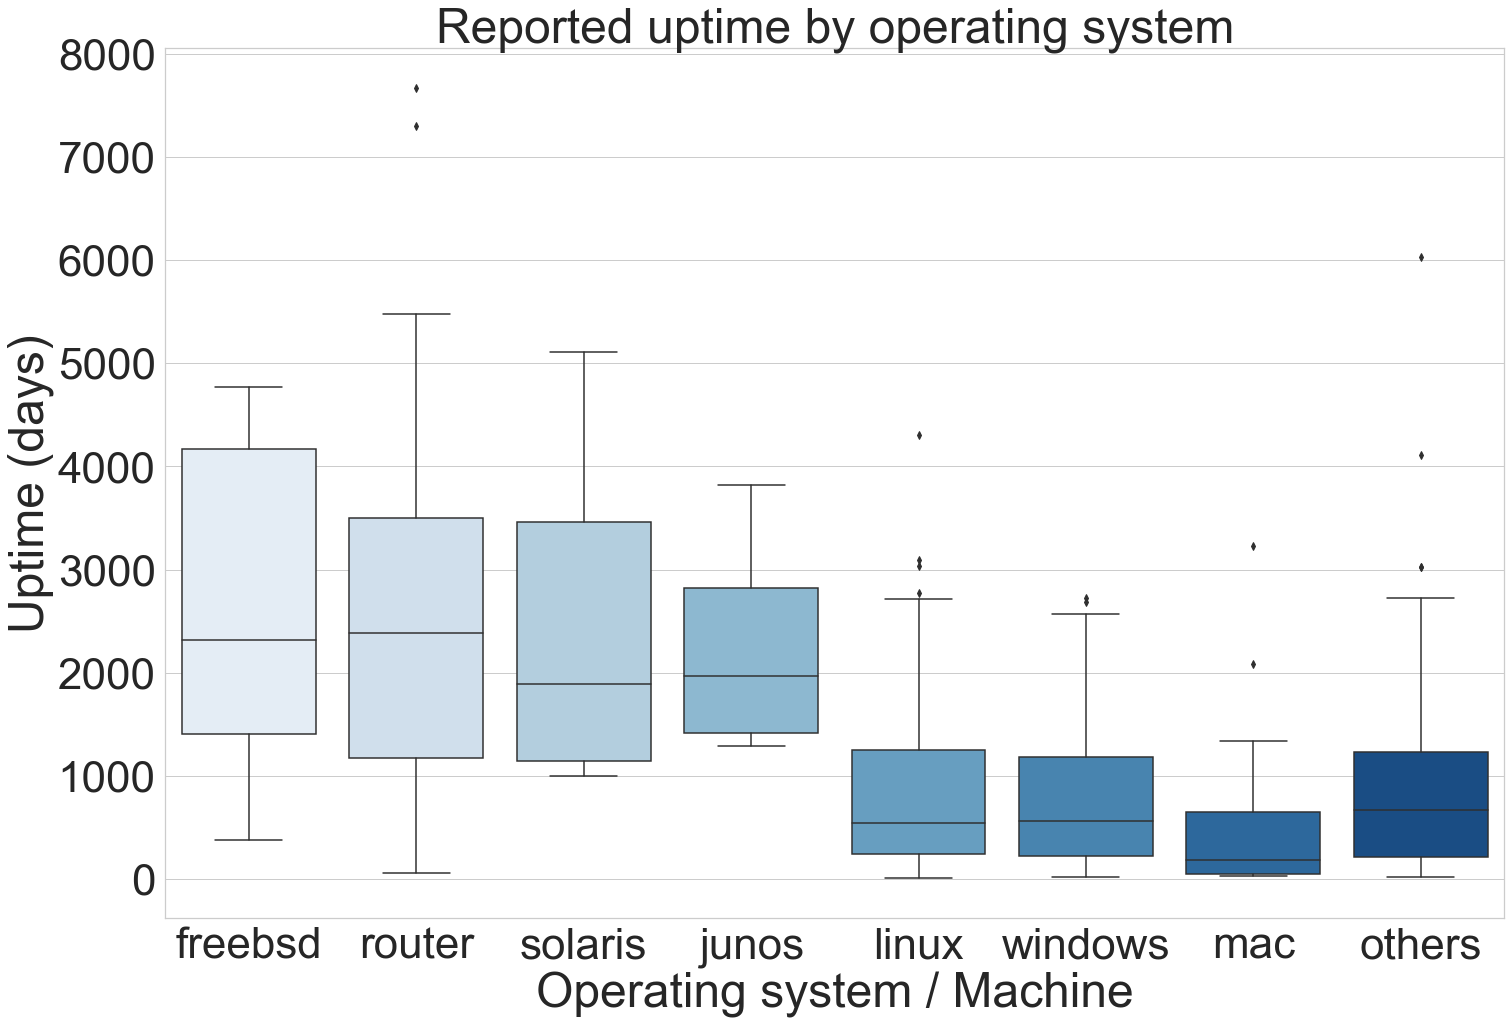

In [243]:
plt.figure(figsize=(24, 16))
sns.set(font_scale=4, style='whitegrid')
ax = sns.boxplot(x="Operating system / Machine", y="Uptime (days)", data=dataframe, palette='Blues',
                order = ['freebsd', 'router', 'solaris', 'junos', 'linux', 'windows', 'mac', 'others' ]).set_title('Reported uptime by operating system')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

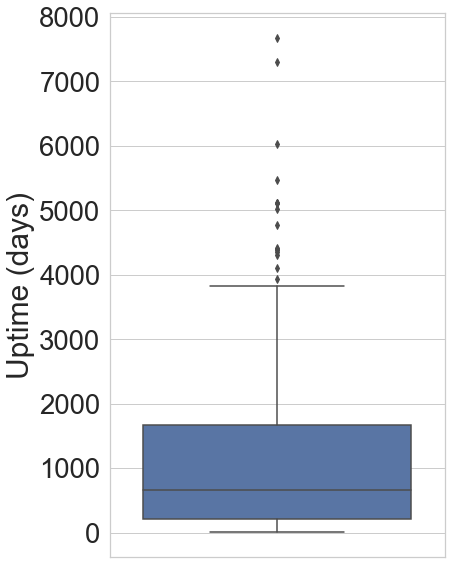

In [175]:
plt.figure(figsize=(6, 10))
sns.set(font_scale=2.5, style='whitegrid')

ax = sns.boxplot(x=dataframe["Uptime (days)"], orient='v')


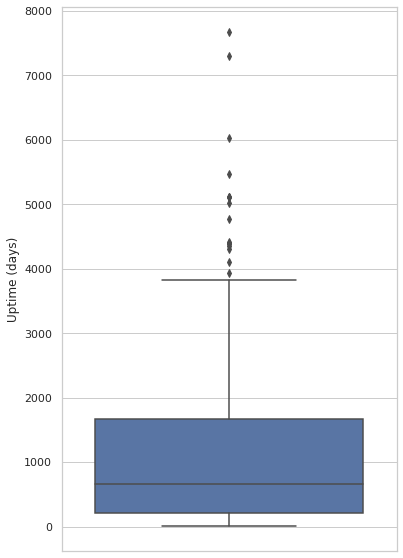

In [155]:
# sns.set(style="whitegrid")
plt.figure(figsize=(6, 10))
# plt.subplots(figsize=(10,10))
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 40}

params = {'legend.fontsize': 20,
          'legend.handlelength': 2}
# plt.rc('font', **font)
plt.rcParams.update(params)
ax = sns.boxplot(x=dataframe["Uptime (days)"], orient='v')

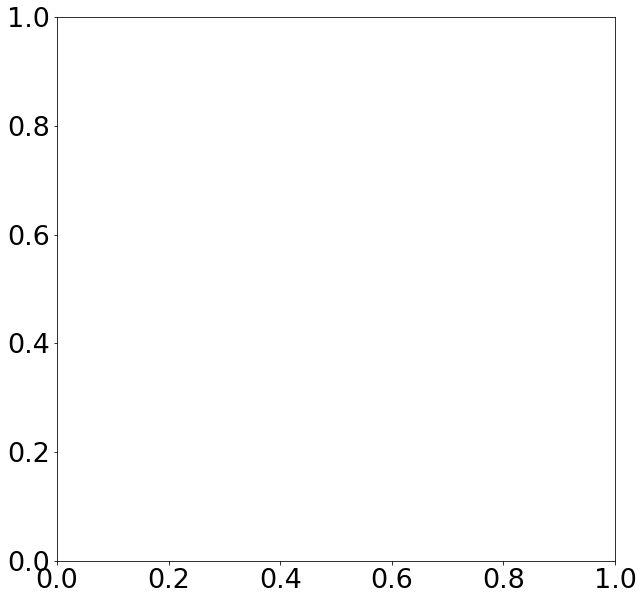

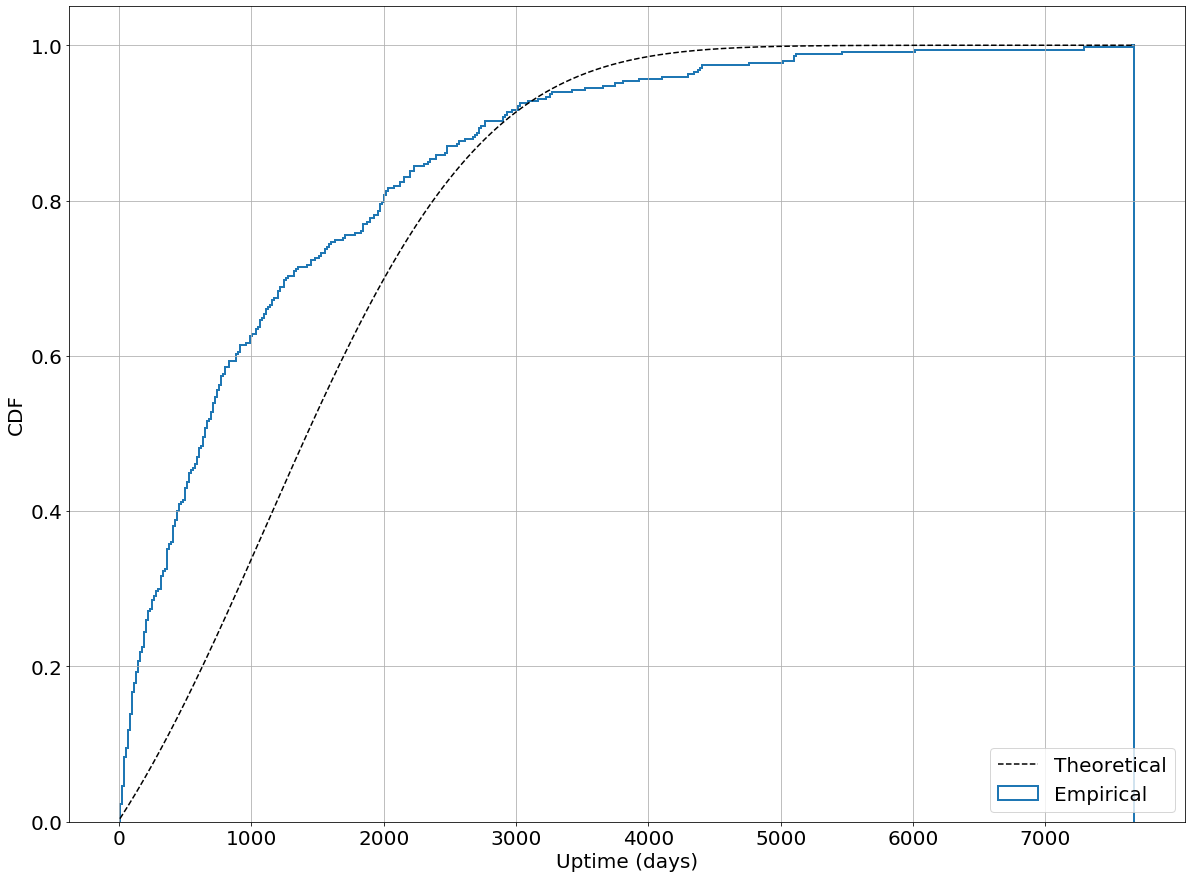

In [18]:
df_uptimes = pd.read_csv("Uptimes - posts.csv")

uptimes = df_uptimes.loc[pd.notna(df_uptimes.Uptimes)].Uptimes


plt.subplots(figsize=(10,10))
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

params = {'legend.fontsize': 20,
          'legend.handlelength': 2}
plt.rc('font', **font)
plt.rcParams.update(params)



mu = np.mean(uptimes)
sigma = np.std(uptimes)
n_bins = 500
n_bins2 = 50
x = uptimes

fig, ax = plt.subplots(figsize=(20, 15))

# n, bins, patches = ax.hist(x, n_bins2, density=True, histtype='bar', linewidth=1.0, fill=False,
#                            cumulative=True)

# plot the cumulative histogram
n, bins, patches = ax.hist(x, n_bins, density=True, histtype='step', linewidth=2.0,
                           cumulative=True, label='Empirical')

#  plot the cumulative histogram


# Add a line showing the expected distribution.
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
y = y.cumsum()
y /= y[-1]

ax.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical')

# Overlay a reversed cumulative histogram.
# ax.hist(x, bins=bins, density=True, histtype='step', cumulative=-1,
#         label='Reversed emp.')

# tidy up the figure
ax.grid(True)
ax.legend(loc='lower right')
# ax.set_title('CDF')
ax.set_xlabel('Uptime (days)')
ax.set_ylabel('CDF')
# plt.xticks(x, np.arange(0,max(uptimes),1000))
plt.xticks(np.arange(0, max(uptimes), 1000))
plt.savefig("cdf2.png", format="png")
plt.show()


In [7]:
import praw
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

reddit = praw.Reddit(client_id='XB-qlj1hx0sI1w', client_secret='mWMrTyCMTd8l1UCjA3jsvfALHlA', user_agent='uptime_scrapper')

hot_posts = reddit.subreddit('uptimeporn').hot(limit=1000)
posts = []
i = 1
for post in hot_posts:
    print(i)
    i+=1
    comments = []
    post.comments.replace_more(limit=None)
    for comment in post.comments.list():
        comments.append(comment.body)
    posts.append([post.score, comments])
    
posts.sort(key=lambda x:x[0], reverse=True)

comments = " "
top_comments_10 = " "
top_comments_50 = " "
for i in range(len(posts)):  
    for comment in posts[i][1]:
        comments += " " + comment
        if i < 10:
            top_comments_10 += " " + comment
        if i < 50:
            top_comments_50 += " " + comment

    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


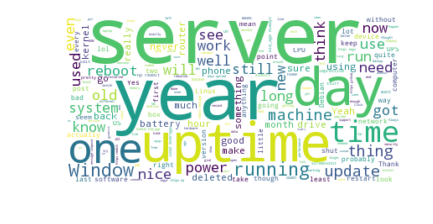

In [8]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


# Create and generate a word cloud image:
wordcloud_all = WordCloud(background_color="white").generate(comments)
wordcloud_top_10 = WordCloud(background_color="white").generate(top_comments_10)
wordcloud_top_50 = WordCloud(background_color="white").generate(top_comments_50)

plt.imshow(wordcloud_all, interpolation='bilinear')
# plt.imshow(wordcloud_top_10, interpolation='bilinear')
# plt.imshow(wordcloud_top_50, interpolation='bilinear')

plt.axis("off")

# wordcloud_all.to_file("comments_wc.png")
# wordcloud_top_10.to_file("comments_top_wc_10.png")
# wordcloud_top_50.to_file("comments_top_wc_50.png")
plt.show()

In [9]:
print(comments.count("update") + comments.count("patch") + comments.count("patches"))

142


In [14]:
# pega comentarios sem ordenar
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import tree
import praw
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

reddit = praw.Reddit(client_id='XB-qlj1hx0sI1w', client_secret='mWMrTyCMTd8l1UCjA3jsvfALHlA', user_agent='uptime_scrapper')

hot_posts = reddit.subreddit('uptimeporn').hot(limit=1000)
posts = []
i = 1
for post in hot_posts:
    print(i)
    i+=1
    comments = []
    post.comments.replace_more(limit=None)
    for comment in post.comments.list():
        comments.append(comment.body)
    posts.append([post.score, comments])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [222]:
df = pd.read_csv("Uptimes - posts.csv")
df = df.fillna(0)
corpus = []
for i in range(len(posts)-1):
    comments = " "
    for comment in posts[i+1][1]:
        comments += " " + comment
    df.at[i, 'Comentarios'] = comments
    corpus.append(comments)

df.head()

,Post number,Title,Img OCR Text,Unnamed: 3,Unnamed: 4,Unnamed: 5,Img Real Text,Uptimes,SO,Post number aux,Comentarios
0,1.0,My IP phone\n,osc Teese\nPaprcrevrrner etree. 0\nru mera\n\n...,0.0,0.0,0.0,0.0,327.0,android,2.0,
1,2.0,1897 days & counting\n,"[root@ EO Eee bata\n@9:03:23 up 1897 days, 6:4...",0.0,0.0,0.0,0.0,1897.0,linux,3.0,"Waah, another admin just rebooted it a few s..."
2,3.0,Moving this baby soon :( VPS running remote su...,fi javier — bbrother@remote: ~ — ssh bbrother@...,0.0,0.0,0.0,0.0,923.0,linux,4.0,
3,4.0,Goodbye old friend\n,"[root@dev ~]# uptime\n\n16:10:56 up 1598 days,...",0.0,0.0,0.0,0.0,1598.0,linux,5.0,And now his watch is ended. Seriously the sa...
4,5.0,About to shut down my little free-trial GCP VM...,ena\n\n[root@slowpoke ~]# uptime\n15:26:37 up ...,0.0,0.0,0.0,0.0,265.0,linux,6.0,A 265 day free trial? ooh free tiers haha ni...


In [223]:
# add columns words
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', encoding='utf-8')
vectorizer.fit_transform(corpus)

for word in vectorizer.vocabulary_.keys():
    df[word] = np.repeat(0, len(df))
for i in range(len(df)):
    for word in vectorizer.vocabulary_.keys():
        if word in str(df.iloc[i, df.columns.get_loc('Comentarios')]):
            df.at[i, word] = 1
df.head()
            

,Post number,Title,Img OCR Text,Unnamed: 3,Unnamed: 4,Unnamed: 5,Img Real Text,Uptimes,SO,Post number aux,...,connection,old_age,ching,hdd,kick,pool,_108528,stage,built,spoil
0,1.0,My IP phone\n,osc Teese\nPaprcrevrrner etree. 0\nru mera\n\n...,0.0,0.0,0.0,0.0,327.0,android,2.0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1897 days & counting\n,"[root@ EO Eee bata\n@9:03:23 up 1897 days, 6:4...",0.0,0.0,0.0,0.0,1897.0,linux,3.0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,Moving this baby soon :( VPS running remote su...,fi javier — bbrother@remote: ~ — ssh bbrother@...,0.0,0.0,0.0,0.0,923.0,linux,4.0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,Goodbye old friend\n,"[root@dev ~]# uptime\n\n16:10:56 up 1598 days,...",0.0,0.0,0.0,0.0,1598.0,linux,5.0,...,0,0,0,0,0,0,0,0,0,0
4,5.0,About to shut down my little free-trial GCP VM...,ena\n\n[root@slowpoke ~]# uptime\n15:26:37 up ...,0.0,0.0,0.0,0.0,265.0,linux,6.0,...,0,0,0,0,0,0,0,0,0,0


In [224]:
df.rename(columns={'router':'routerComment'}, inplace=True)

df['linux'] = np.repeat(0, len(df))
df['windows'] = np.repeat(0, len(df))
df['router'] = np.repeat(0, len(df))
df['android'] = np.repeat(0, len(df))
sos = ['linux', 'android', 'windows', 'router']
for i in range(len(df)):
    if df.iloc[i, df.columns.get_loc('SO')] in sos:
        df.at[i, df.iloc[i, df.columns.get_loc('SO')]] = 1


In [229]:
from sklearn import tree
# arvore de regressao para uptimes
df2 = df.copy()
index = df2['Post number'].dropna()[:-1]
df2 = df2.iloc[index]

ups = df2['Uptimes']

X = df2[['linux', 'windows', 'android', 'router', 'update', 'patch', 'patches']]
# X = np.transpose(np.array([router, windows, android]))
# X = df2[df2.columns.difference(['Img Real Text', 'Uptimes', 'SO', 'Title', 'Comentarios', 'Img OCR Text', 'Post number', 'Post number aux'])]
X = X.fillna(0)
Y = ups.fillna(0).reshape(-1, 1)

regressor = tree.DecisionTreeRegressor(max_depth=3, random_state = 0, criterion='mae')
regressor.fit(X, Y)
predicted = regressor.predict(X)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  del sys.path[0]


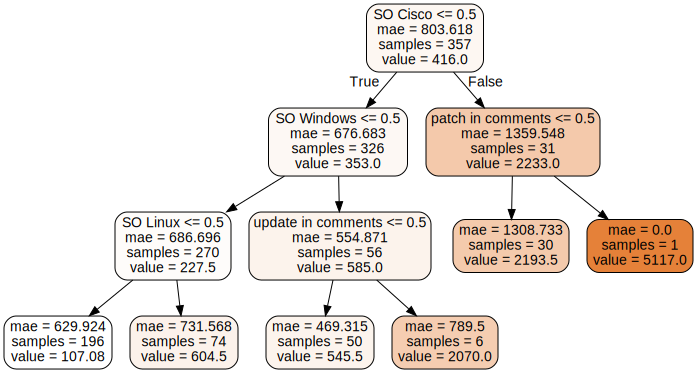

In [232]:
import graphviz 
from sklearn.tree import export_graphviz 

feature_names = ['SO Linux', 'SO Windows', 'SO Android', 'SO Cisco', 'update in comments', 'patch in comments', 'patches in comments']
dot_data = export_graphviz(regressor, feature_names=feature_names, out_file =None, rounded=True, filled=True)

graph = graphviz.Source(dot_data, format="png")
graph
# graph.render("regression_tree_especifica2")

In [309]:
# arvore de classificacao para SOs
df2 = df.copy()
index = df2['Post number'].dropna()[:-1]
df2 = df2.iloc[index].dropna()
df2 = df2[df2['SO'] != 0]
df2 = df2[(df2['SO'] == 'linux') | (df2['SO'] == 'windows') | (df2['SO'] == 'router')]
X = df2[['Uptimes', 'update', 'patch', 'patches']]
# X = np.transpose(np.array([router, windows, android]))
# X = df2[df2.columns.difference(['Img Real Text', 'Uptimes', 'SO', 'Title', 'Comentarios', 'Img OCR Text', 'Post number', 'Post number aux'])]
X = X.fillna(0)
Y = df2['SO']

clf = tree.DecisionTreeClassifier(max_depth=2)
clf.fit(X, Y)
# predicted = clf.predict(X)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [311]:
import graphviz 
from sklearn.tree import export_graphviz 

feature_names = ['Uptimes', 'update', 'patch', 'patches']
dot_data = export_graphviz(clf, feature_names=feature_names, class_names=clf.classes_, out_file =None, rounded=True, filled=True)

graph = graphviz.Source(dot_data, format="png")
# graph.render("classfication_tree_so")

'classfication_tree_so.png'

# Wordclouds

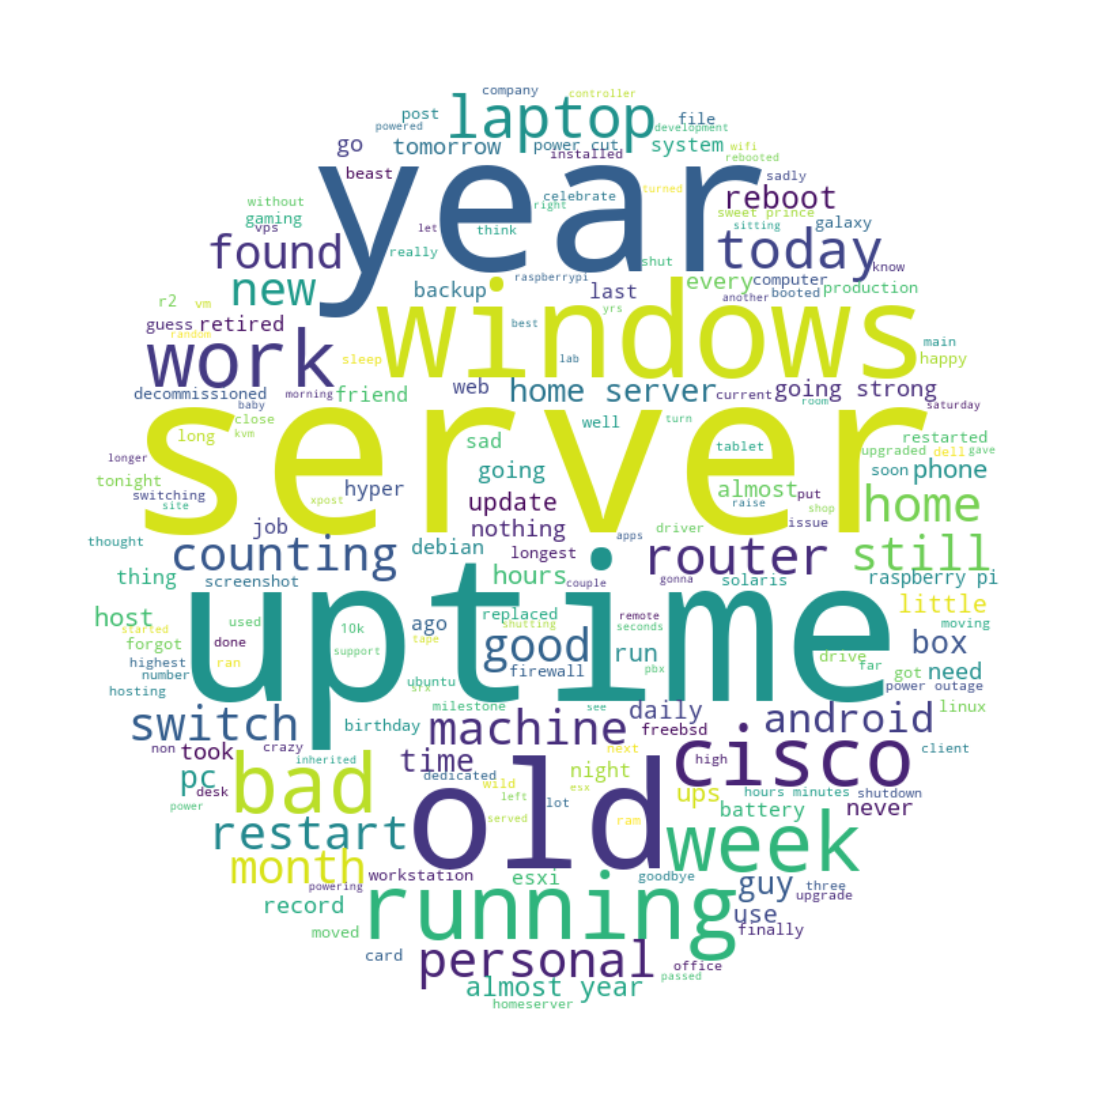

In [35]:
#Most frequent words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import string

# vectorizer = CountVectorizer()
# justific = feedbacks_stress[ ['Explanation_en', 'Preferred_video','Session'] ].copy()
# justific.dropna(inplace=True)
# justificativas = justific['Explanation_en']
# # justificativas = justific[justific['num_video_preferido']==2]['justificativa']
# # justificativas = lowQoS['justificativa'].dropna()
# X = vectorizer.fit_transform(justificativas)
# sum_words = X.sum(axis=0)
# words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
# # print(sorted(words_freq, key = lambda x: x[1], reverse=True)[:50])


# # Create the wordcloud object
def print_wordcloud(dataframe, parameter, value=None, parameter2=None, value2=None, w=800, h=400, color='white'):
    from nltk.tokenize import RegexpTokenizer
    from nltk.corpus import stopwords
    from nltk import word_tokenize
    import string
    
    
    stopWords = stopwords.words('english')+['video','videos','first','second',
                                                'much', 'the', '1', '2', 'i', 'it', "'s'", 'by', 'vídeo2','vídeo1', 'even',
                                           'made', 'case', 'want', 'one', 'two','better', 'day', 'days']
#     stopWords = stopwords.words('portuguese')+['video','videos', 'vídeo', 'vídeos', 'primeiro','segundo',
#                                                 'much', 'the', '1', '2', 'i', 'it', "'s'", 'by', 'vídeo2','vídeo1', 'even',
#                                            'made', 'case', 'want', 'one', 'two','better', 'um', 'dois', 'porque']
   
    data_temp = dataframe
    
    if (parameter != None and value != None):
        data_temp = dataframe[dataframe[parameter]==value]
   
    if (parameter2 != None and value2 != None):
        data_temp = data_temp[data_temp[parameter2]==value2]
        
#     word_set = ' '.join(data_temp['Explanation_en'])
    word_set = ' '.join(data_temp['Title'])
    word_set = word_set.lower()
    
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(word_set)
    
    filtered = [w for w in tokens if not w in stopWords]
    word_set = ' '.join(filtered)
    
    if (len(word_set) != 0):
        pass
#         wordcloud = WordCloud(width=w, height=h, margin=0, collocations=True, background_color=color).generate(word_set)
#         # # Display the generated image:
#         plt.figure(1,figsize=(13, 13))
#         plt.imshow(wordcloud, interpolation='bilinear')
#         plt.axis("off")
#         plt.margins(x=0, y=0)
#         plt.show()

        fig_size = plt.rcParams["figure.figsize"]
        fig_size[0] = 20
        fig_size[1] = 20
        plt.rcParams["figure.figsize"] = fig_size
        x, y = np.ogrid[:w, :w]

        mask = (x - w*0.5) ** 2 + (y - w*0.5) ** 2 > (w*0.43) ** 2
        mask = 255 * mask.astype(int)


        wc = WordCloud(background_color='white', prefer_horizontal=1, margin=0,  
                       repeat=True, collocations=True, relative_scaling=0.55, mask=mask)
        wc.generate(word_set)

        plt.axis("off")
        plt.figure(1,figsize=(20, 20))
        plt.imshow(wc, interpolation="bilinear")
        plt.show()
        
    else:
        print("/Empty WordCloud/")
        
print_wordcloud(dataframe, 'Title')

In [28]:
dataframe

,Post number,Title,Img OCR Text,Img Real Text,Uptimes
0,1,My IP phone\n,osc Teese\nPaprcrevrrner etree. 0\nru mera\n\n...,NaN,327.0
1,2,1897 days & counting\n,"[root@ EO Eee bata\n@9:03:23 up 1897 days, 6:4...",NaN,1897.0
2,3,Moving this baby soon :( VPS running remote su...,fi javier — bbrother@remote: ~ — ssh bbrother@...,NaN,923.0
3,4,Goodbye old friend\n,"[root@dev ~]# uptime\n\n16:10:56 up 1598 days,...",NaN,1598.0
4,5,About to shut down my little free-trial GCP VM...,ena\n\n[root@slowpoke ~]# uptime\n15:26:37 up ...,NaN,265.0
5,6,Huawei modem\n,Downlink rate keive\n\nOnline time 7eatahi mine,NaN,754.0
6,7,This server must've never been rebooted... cos...,"eee cn :~ (ssh)\n\n9%) Tasks: 884 total, 2 run...",NaN,1483.0
7,8,I'm embarrassed to post this...\n,"root@proxmox:~# uptime\n12:50:14 up 1140 days,...",NaN,1140.0
8,9,"Shutting it down tomorrow, so close to 4 digit...",EC)\nease\nDOOR RCC PC PREC oe Me el oe\n\nVMw...,NaN,990.0
9,10,Not bad for daily driven gaming/web browsing p...,Rea\n\n \n\n \n\n \n\n \n\nFile Options View\n...,NaN,20.0


In [27]:
dataframe.dropna(subset=['Title'], inplace=True)

In [19]:
dataframe['Title']

0                                          My IP phone\n
1                                 1897 days & counting\n
2      Moving this baby soon :( VPS running remote su...
3                                   Goodbye old friend\n
4      About to shut down my little free-trial GCP VM...
5                                         Huawei modem\n
6      This server must've never been rebooted... cos...
7                      I'm embarrassed to post this...\n
8      Shutting it down tomorrow, so close to 4 digit...
9      Not bad for daily driven gaming/web browsing p...
10     Windows 10 Home box at work which only serves ...
11                   10.7 years and still going strong\n
12     3032 days. Last time it booted, there was a di...
13     Not bad for a Windows 7 box that runs lab equi...
14                                             Sad day\n
15                         Uptime on an ESX machine...\n
16                  I see your 610 hours and raise you\n
17                             

In [6]:
dataframe

,Post number,Title,Img OCR Text,Img Real Text,Uptimes
0,1,My IP phone\n,osc Teese\nPaprcrevrrner etree. 0\nru mera\n\n...,NaN,327.0
1,2,1897 days & counting\n,"[root@ EO Eee bata\n@9:03:23 up 1897 days, 6:4...",NaN,1897.0
2,3,Moving this baby soon :( VPS running remote su...,fi javier — bbrother@remote: ~ — ssh bbrother@...,NaN,923.0
3,4,Goodbye old friend\n,"[root@dev ~]# uptime\n\n16:10:56 up 1598 days,...",NaN,1598.0
4,5,About to shut down my little free-trial GCP VM...,ena\n\n[root@slowpoke ~]# uptime\n15:26:37 up ...,NaN,265.0
5,6,Huawei modem\n,Downlink rate keive\n\nOnline time 7eatahi mine,NaN,754.0
6,7,This server must've never been rebooted... cos...,"eee cn :~ (ssh)\n\n9%) Tasks: 884 total, 2 run...",NaN,1483.0
7,8,I'm embarrassed to post this...\n,"root@proxmox:~# uptime\n12:50:14 up 1140 days,...",NaN,1140.0
8,9,"Shutting it down tomorrow, so close to 4 digit...",EC)\nease\nDOOR RCC PC PREC oe Me el oe\n\nVMw...,NaN,990.0
9,10,Not bad for daily driven gaming/web browsing p...,Rea\n\n \n\n \n\n \n\n \n\nFile Options View\n...,NaN,20.0
